In [56]:
#Importa bibliotecas necessárias
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import *

----
## Parâmetros

In [57]:
# Dimensões (m)
c = 0.23                # livro (comprimento)
l = 0.16                # livro (largura)
h = 0.02                # livro (altura)

# Áreas (m²)
As = l*h                 # livro (area de contato contra o ar)

# Volumes (m³)
v = l*h*c               # livro

# Densidades (kg/m³)
rhol = 1500               # livro
rhoa = 1

# Massas (kg)
m = rhol*v             # livro

# Gravidade (m/s²)
g = 9.81

# Coeficiente de Arrasto
Cd = 1.05

# Ângulo limite (graus)
angle_l = 14

# Coeficiente de Atrito
mic = tan(radians(angle_l))

----
## 1° Iteração

In [58]:
# Modelo sem Arrasto
def modelo1 (X, t, angle):
    
    rang = radians(angle)

    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]
    
    
    Nx = g*cos(rang)*sin(rang)
    Ny = g*cos(rang)**2
    Fatx = mic*g*cos(rang)**2
    Faty = mic*g*cos(rang)*sin(rang)
    
    dxdt = vx
    dydt = vy
    dvxdt = Nx - Fatx
    dvydt = Ny + Faty - g
    
    if angle < angle_l:
        return [0, 0, 0, 0]
    elif y < 0:
        # if dxdt > 0:
        #     return [dxdt, 0, -mic*g, 0]
        # else:
        #     return [0, 0, 0, 0]
        return [0, 0, 0, 0]
    else:
        return [dxdt, dydt, dvxdt, dvydt]

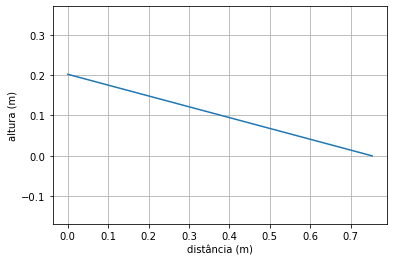

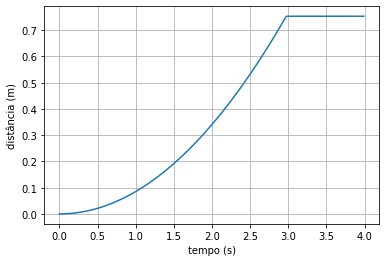

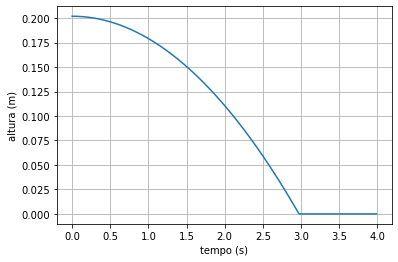

In [59]:
t_lista = np.arange(0, 4, 0.01)

# Condições iniciais
angle = 15
x0 = [0, 0.78*sin(radians(angle)), 0, 0]

# Resolução numérica
x = odeint(modelo1, x0, t_lista, args = (angle,))
listx = x[:,0]
listy = x[:,1]

# Plota gráfico somente para apresentação
plt.plot(listx, listy)
plt.axis('equal')
plt.title('')
plt.xlabel('distância (m)')
plt.ylabel('altura (m)')
plt.grid(True)
plt.show()
print()

plt.plot(t_lista, listx)
plt.title('')
plt.xlabel('tempo (s)')
plt.ylabel('distância (m)')
plt.grid(True)
plt.show()

plt.plot(t_lista, listy)
plt.title('')
plt.xlabel('tempo (s)')
plt.ylabel('altura (m)')
plt.grid(True)
plt.show()

In [60]:
def modelo2 (X, t, angle):
    
    rang = radians(angle)

    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]
    
    
    Nx = g*cos(rang)*sin(rang)
    Ny = g*cos(rang)**2
    Fatx = mic*g*cos(rang)**2
    Faty = mic*g*cos(rang)*sin(rang)
    # Farx = 0.5 * rhoa *
    # Fary =
    
    dxdt = vx
    dydt = vy
    dvxdt = Nx - Fatx
    dvydt = +Ny + Faty - g
    
    if angle < angle_l:
        return [0, 0, 0, 0]
    elif y < 0:
        if dxdt > 0:
            return [dxdt, 0, -mic*g, 0]
        else:
            return [0, 0, 0, 0]
    else:
        return [dxdt, dydt, dvxdt, dvydt]